In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Employees.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [17]:
df.rename(columns={'edad':'Age', 'abandono':'Quit', 'viajes':'Travels', 'departamento':'Position', 'distancia_casa':'distance_home','educacion':'Education', 'carrera':'career','empleados':'employees', 'satisfaccion_entorno':'satisfaction', 'sexo':'sex', 'implicacion':'implication', 'nivel_laboral':'level', 'puesto':'position', 'satisfaccion_trabajo':'working_satisfaction', 'estado_civil':'status', 'salario_mes':'monthly_income', 'num_empresas_anteriores':'experience',  'mayor_edad ':'over_18',  'horas_extra':'extra_hours',  'incremento_salario_porc':'salary_increase',  'evaluacion':'evaluation',  'satisfaccion_companeros':'colleges_satisfaction',  'horas_quincena':'hours_fortnight',  'nivel_acciones':'stocks',  'anos_experiencia':'years_expericence',  'num_formaciones_ult_ano':'hours_formation_last_year', 'conciliacion':'conciliation', 'anos_compania':'years_company', 'anos_en_puesto':'years_position', 'anos_desde_ult_promocion':'years_since_last_promotion', 'anos_con_manager_actual':'years_actual_boss'},inplace = True)



df

,Age,Quit,Travels,Position,distance_home,Education,career,employees,satisfaction,sex,...,salary_increase,evaluation,colleges_satisfaction,hours_fortnight,stocks,years_expericence,hours_formation_last_year,years_company,years_since_last_promotion,years_actual_boss
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


In [11]:
df.isna().sum().sort_values(ascending = False)

years_position                1238
conciliation                  1011
sex                            199
Education                      101
working_satisfaction            76
implication                     18
Age                              0
stocks                           0
evaluation                       0
colleges_satisfaction            0
hours_fortnight                  0
years_expericence                0
extra_hours                      0
hours_formation_last_year        0
years_company                    0
years_since_last_promotion       0
salary_increase                  0
monthly_income                   0
mayor_edad                       0
experience                       0
Quit                             0
status                           0
position                         0
level                            0
satisfaction                     0
employees                        0
career                           0
distance_home                    0
Position            

In [12]:
df.drop(columns = ['years_position','conciliation'], inplace = True)
df

,Age,Quit,Travels,Position,distance_home,Education,career,employees,satisfaction,sex,...,salary_increase,evaluation,colleges_satisfaction,hours_fortnight,stocks,years_expericence,hours_formation_last_year,years_company,years_since_last_promotion,years_actual_boss
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


In [14]:
def graph_age(cat):
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    ax = ax.flat 

    for x, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[x])
        ax[x].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[x].tick_params(labelsize = 12)

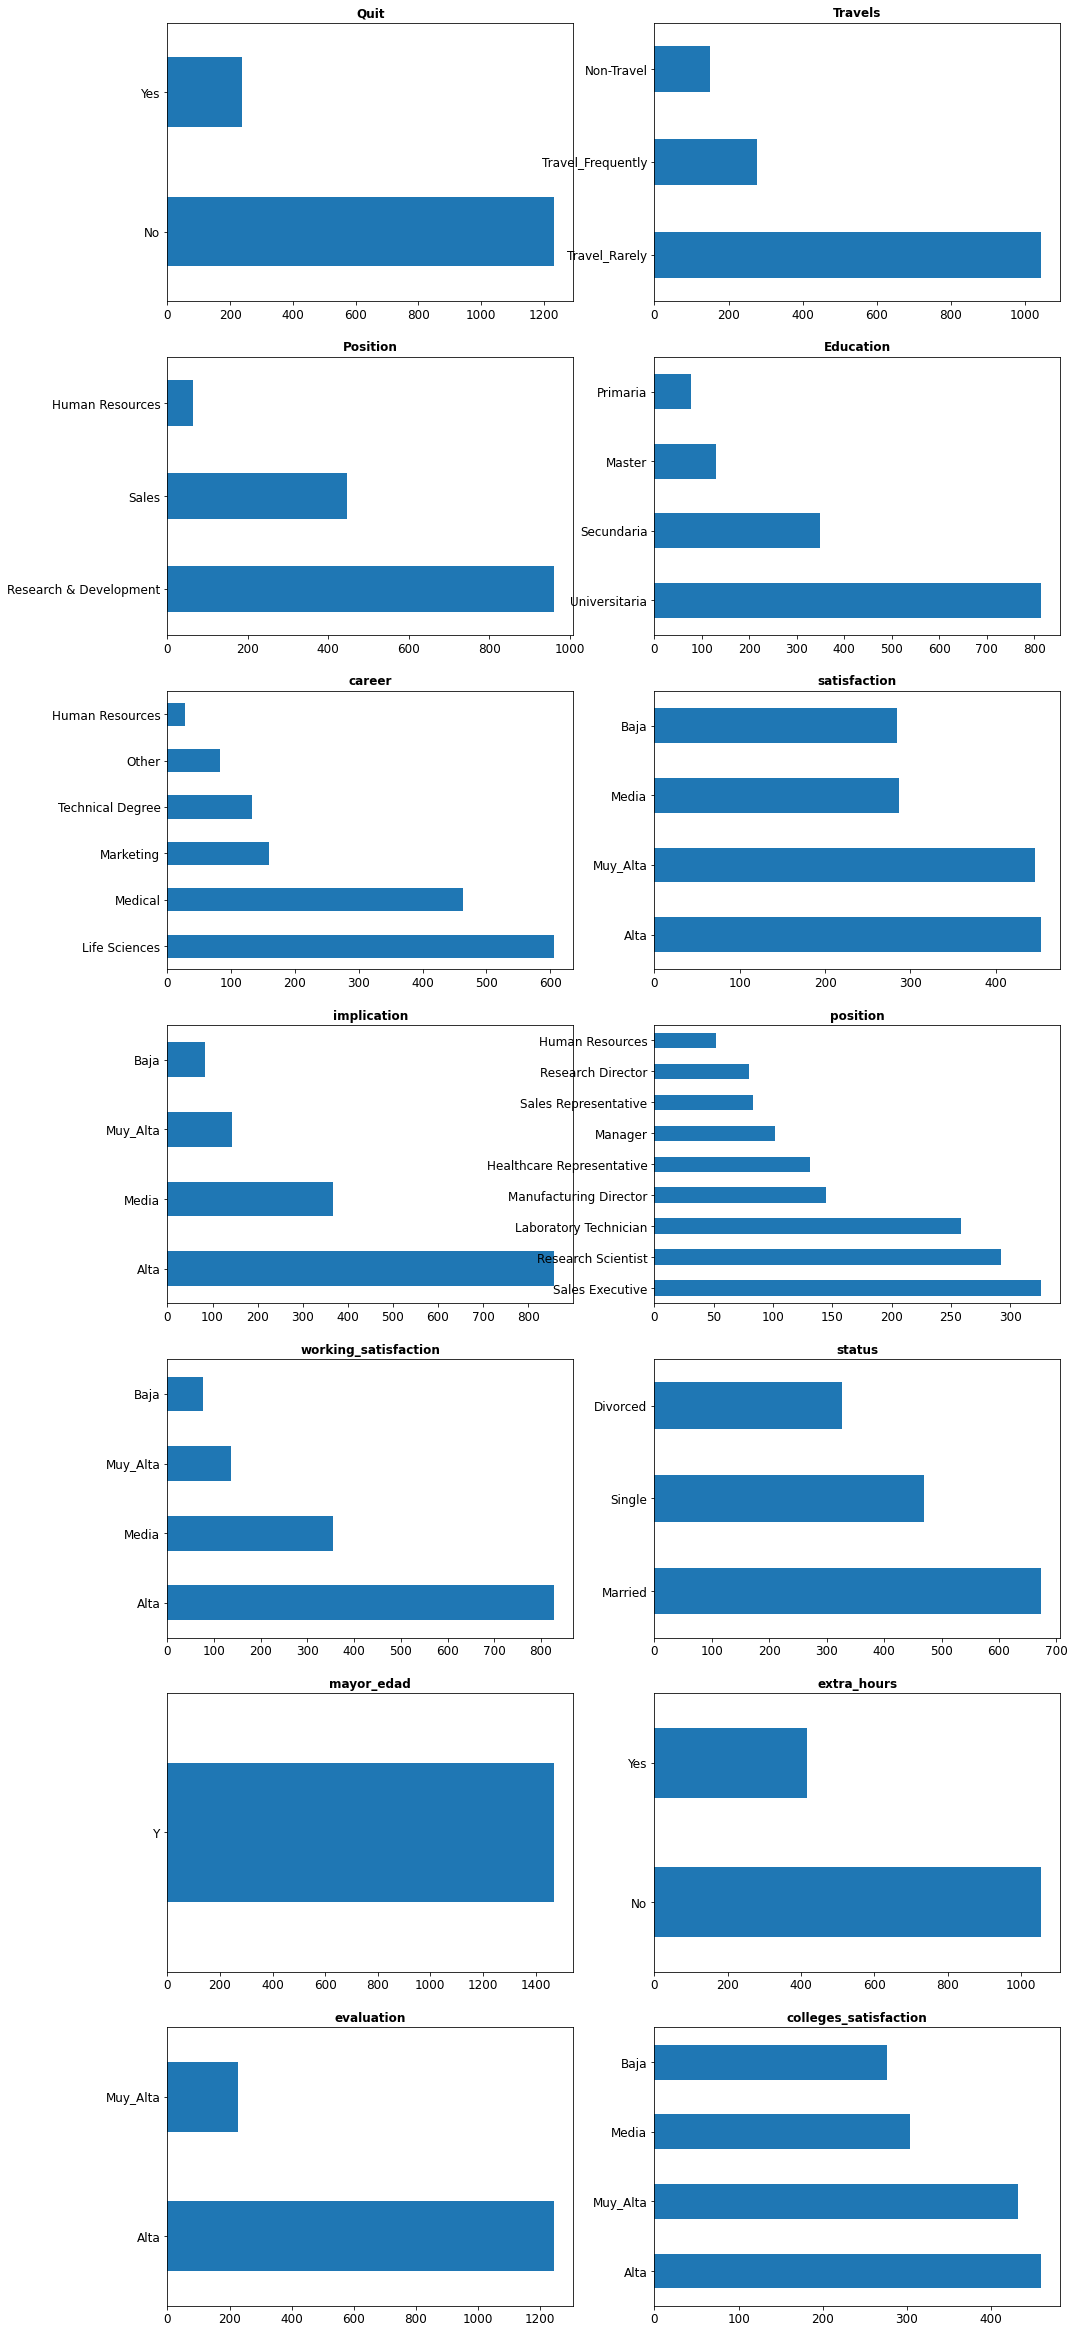

In [18]:
graph_age(df.select_dtypes('O'))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1470 non-null   int64  
 1   Quit                        1470 non-null   object 
 2   Travels                     1470 non-null   object 
 3   Position                    1470 non-null   object 
 4   distance_home               1470 non-null   int64  
 5   Education                   1369 non-null   object 
 6   career                      1470 non-null   object 
 7   employees                   1470 non-null   int64  
 8   satisfaction                1470 non-null   object 
 9   sex                         1271 non-null   float64
 10  implication                 1452 non-null   object 
 11  level                       1470 non-null   int64  
 12  position                    1470 non-null   object 
 13  working_satisfaction        1394 

In [19]:
df.drop(columns = 'mayor_edad', inplace = True)

df['Education'] = df['Education'].fillna('Universitaria')

df['working_satisfaction'] = df['working_satisfaction'].fillna('Alta')

df['implication'] = df['implication'].fillna('Alta')

In [20]:
def statisticians_cont(num):
    statisticians = num.describe().T
    statisticians['median'] = num.median()
    statisticians = statisticians.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(statisticians)

In [21]:
statisticians_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Age,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distance_home,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
employees,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sex,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
level,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
monthly_income,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
experience,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
salary_increase,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
hours_fortnight,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
stocks,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


In [22]:
df.drop(columns = ['employees','sex','hours_fortnight'], inplace = True)
df

,Age,Quit,Travels,Position,distance_home,Education,career,satisfaction,implication,level,...,extra_hours,salary_increase,evaluation,colleges_satisfaction,stocks,years_expericence,hours_formation_last_year,years_company,years_since_last_promotion,years_actual_boss
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


In [23]:
df.Quit.value_counts(normalize = True) * 100

No     83.877551
Yes    16.122449
Name: Quit, dtype: float64

In [26]:
df['Quit'] = df.Quit.map({'No':0, 'Yes':1})

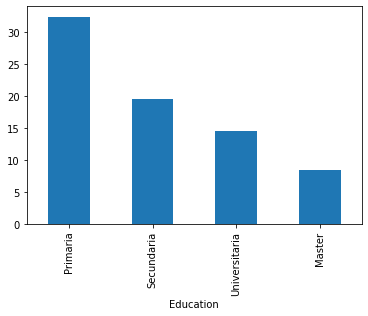

In [27]:
temp = df.groupby('Education').Quit.mean().sort_values(ascending = False) * 100
temp.plot.bar();

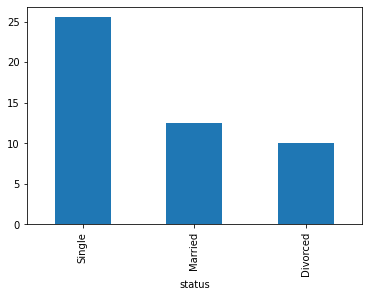

In [28]:
temp = df.groupby('status').Quit.mean().sort_values(ascending = False) * 100
temp.plot.bar();

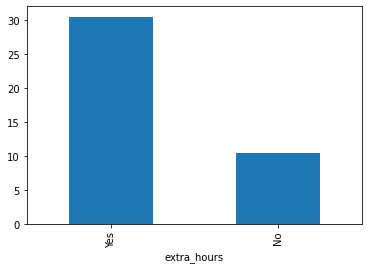

In [29]:
temp = df.groupby('extra_hours').Quit.mean().sort_values(ascending = False) * 100
temp.plot.bar();

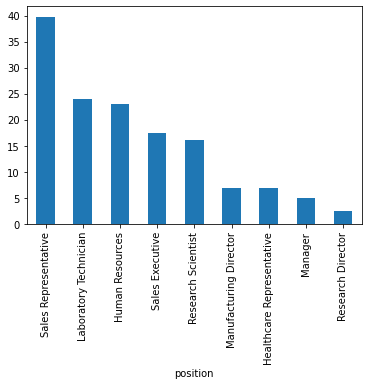

In [30]:
temp = df.groupby('position').Quit.mean().sort_values(ascending = False) * 100
temp.plot.bar();

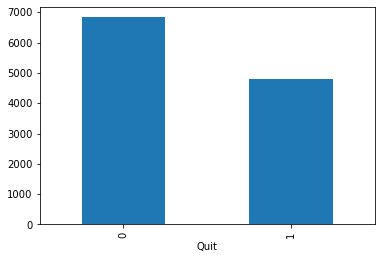

In [31]:
temp = df.groupby('Quit').monthly_income.mean()
temp.plot.bar();

# Economical impact of people Quitting

In [32]:
df['yearly_salary'] = df.monthly_income.transform(lambda x: x*12)
df[['monthly_income','yearly_salary']]

,monthly_income,yearly_salary
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [33]:
conditions = [(df['yearly_salary'] <= 30000),
               (df['yearly_salary'] > 30000) & (df['yearly_salary'] <= 50000),
               (df['yearly_salary'] > 50000) & (df['yearly_salary'] <= 75000),
               (df['yearly_salary'] > 75000)]

result = [df.yearly_salary * 0.161, df.yearly_salary * 0.197, df.yearly_salary * 0.204, df.yearly_salary * 0.21]
                
df['dropout_impact'] = np.select(conditions,result, default = -999)

df

,Age,Quit,Travels,Position,distance_home,Education,career,satisfaction,implication,level,...,evaluation,colleges_satisfaction,stocks,years_expericence,hours_formation_last_year,years_company,years_since_last_promotion,years_actual_boss,yearly_salary,dropout_impact
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


# how much did it cost to the company in the last year

In [34]:
total_cost =  df.loc[df.Quit == 1].dropout_impact.sum()
total_cost

2719005.912

# How much does it cost us that employees are not motivated?

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1470 non-null   int64  
 1   Quit                        1470 non-null   int64  
 2   Travels                     1470 non-null   object 
 3   Position                    1470 non-null   object 
 4   distance_home               1470 non-null   int64  
 5   Education                   1470 non-null   object 
 6   career                      1470 non-null   object 
 7   satisfaction                1470 non-null   object 
 8   implication                 1470 non-null   object 
 9   level                       1470 non-null   int64  
 10  position                    1470 non-null   object 
 11  working_satisfaction        1470 non-null   object 
 12  status                      1470 non-null   object 
 13  monthly_income              1470 

In [37]:
df.loc[(df.Quit == 1) & (df.implication == 'Baja')].dropout_impact.sum()

368672.688

# How much money could we save by better retaining our employees?

In [38]:
print(f"Reducing employee drain by 10% would save us {int(total_cost * 0.1)}$ per year.")

print(f"Reducing employee drain by 10% would save us {int(total_cost * 0.2)}$ per year.")

print(f"Reducing employee drain by 10% would save us {int(total_cost * 0.3)}$ per year.")

Reducing employee drain by 10% would save us 271900$ per year.
Reducing employee drain by 10% would save us 543801$ per year.
Reducing employee drain by 10% would save us 815701$ per year.


#  % of sales reps who have left in the past year

We had seen that sales representatives are the position that leaves the most. Would it make sense to make a specific plan for them? What would be the cost saved if we reduce the leak by 30%?

In [39]:
total_reps_past = len(df.loc[df.position == 'Sales Representative'])
quit_repre_past = len(df.loc[(df.position == 'Sales Representative') & (df.Quit == 1)])
porc_past = quit_repre_past / total_reps_past

porc_past

0.39759036144578314

Now we are going to estimate how many will leave us this year

In [40]:
total_reps_actual = len(df.loc[(df.position == 'Sales Representative') & (df.Quit == 0)])
will_leave = int(total_reps_actual * porc_past)

will_leave

19

about them, how many can we retain (30% hypothesis) and how much money can be

In [42]:
retain = int(will_leave * 0.3)

saves = df.loc[(df.position == 'Sales Representative') & (df.Quit == 0),'dropout_impact'].sum() * porc_past * 0.3

print(f'We can retain {retain} sales representative and this would mean saving {saves}$.')




We can retain 5 sales representative and this would mean saving 37447.22424578312$.


Since we know that we can spend up to $37,000 just on specific actions to retain sales representatives and they would be paying for themselves with the avoided loss

# Machine Learning

In [43]:
df_ml = df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1470 non-null   int64  
 1   Quit                        1470 non-null   int64  
 2   Travels                     1470 non-null   object 
 3   Position                    1470 non-null   object 
 4   distance_home               1470 non-null   int64  
 5   Education                   1470 non-null   object 
 6   career                      1470 non-null   object 
 7   satisfaction                1470 non-null   object 
 8   implication                 1470 non-null   object 
 9   level                       1470 non-null   int64  
 10  position                    1470 non-null   object 
 11  working_satisfaction        1470 non-null   object 
 12  status                      1470 non-null   object 
 13  monthly_income              1470 

In [44]:
from sklearn.preprocessing import OneHotEncoder

cat = df_ml.select_dtypes('O')

ohe = OneHotEncoder(sparse = False)

ohe.fit(cat)

cat_ohe = ohe.transform(cat)

cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

cat_ohe

,Travels_Non-Travel,Travels_Travel_Frequently,Travels_Travel_Rarely,Position_Human Resources,Position_Research & Development,Position_Sales,Education_Master,Education_Primaria,Education_Secundaria,Education_Universitaria,...,status_Married,status_Single,extra_hours_No,extra_hours_Yes,evaluation_Alta,evaluation_Muy_Alta,colleges_satisfaction_Alta,colleges_satisfaction_Baja,colleges_satisfaction_Media,colleges_satisfaction_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [45]:
num = df.select_dtypes('number').reset_index(drop = True)

In [46]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,Travels_Non-Travel,Travels_Travel_Frequently,Travels_Travel_Rarely,Position_Human Resources,Position_Research & Development,Position_Sales,Education_Master,Education_Primaria,Education_Secundaria,Education_Universitaria,...,experience,salary_increase,stocks,years_expericence,hours_formation_last_year,years_company,years_since_last_promotion,years_actual_boss,yearly_salary,dropout_impact
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


## modeling design

In [47]:
x = df_ml.drop(columns='Quit')
y = df_ml['Quit']

In [48]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3) 

In [49]:
from sklearn.tree import DecisionTreeClassifier

ac = DecisionTreeClassifier(max_depth=4)

ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

In [50]:
pred = ac.predict_proba(test_x)[:, 1]

In [51]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.7265530629853322

## Interpretation

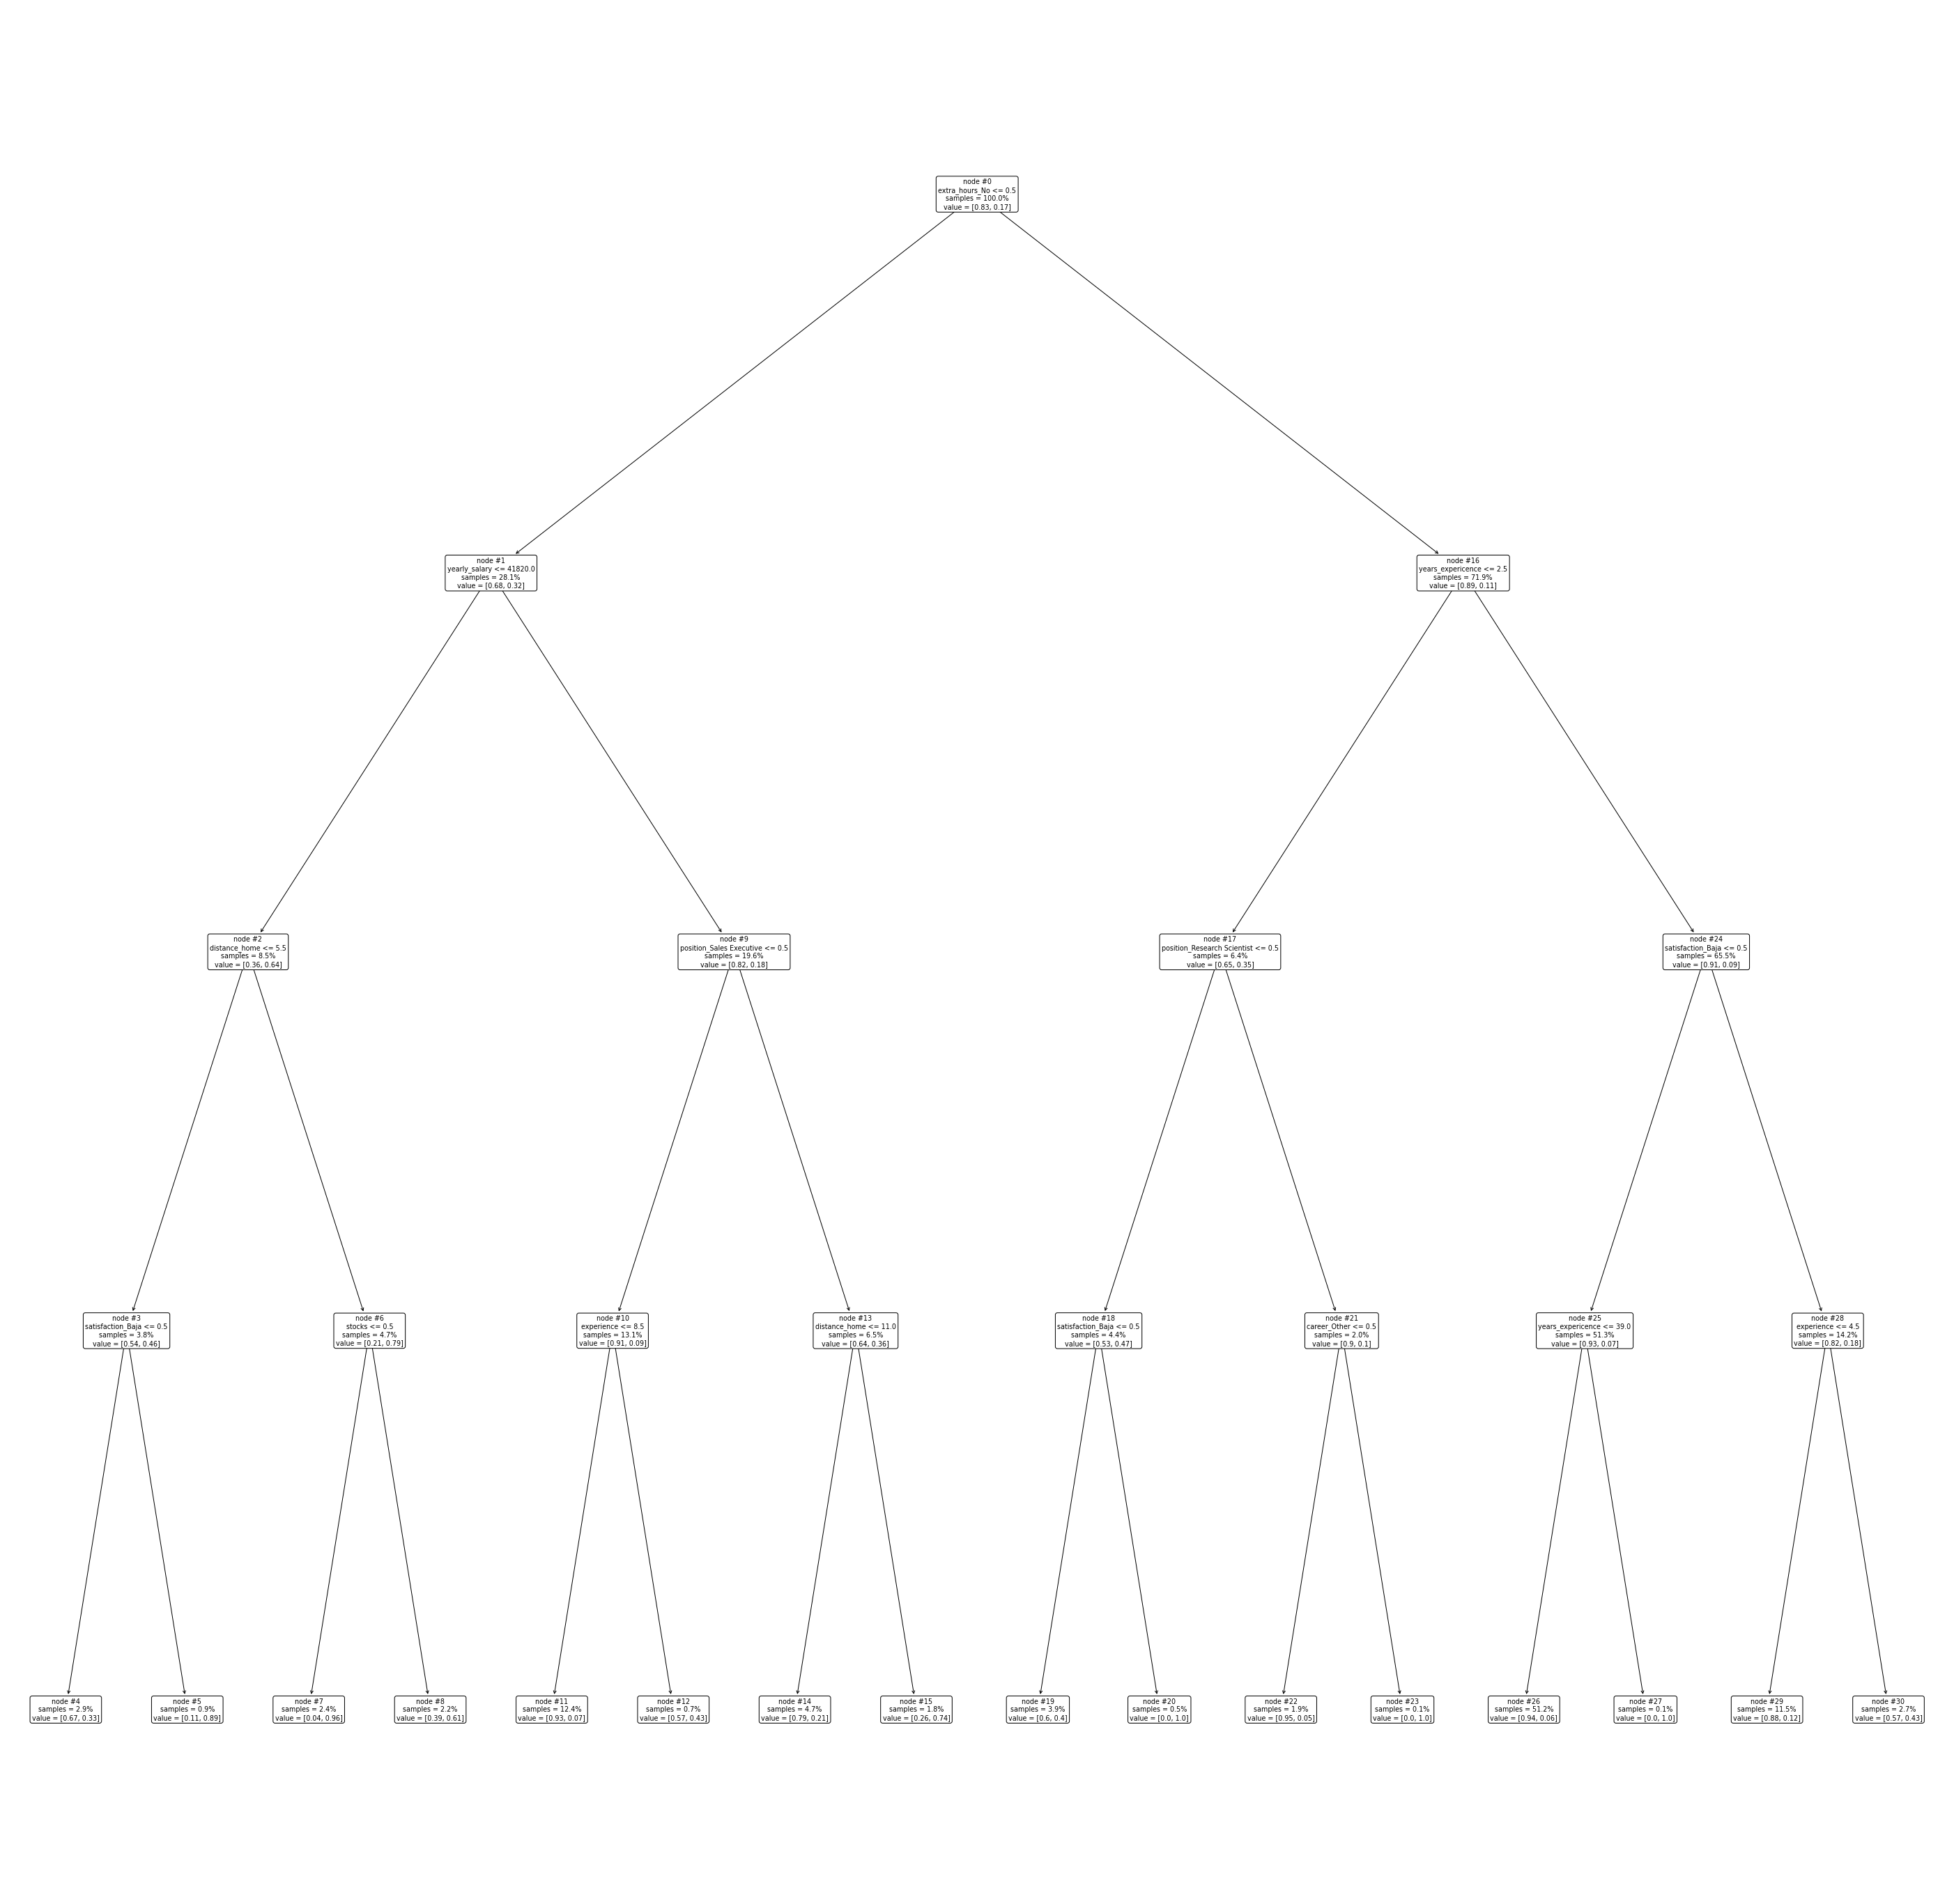

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

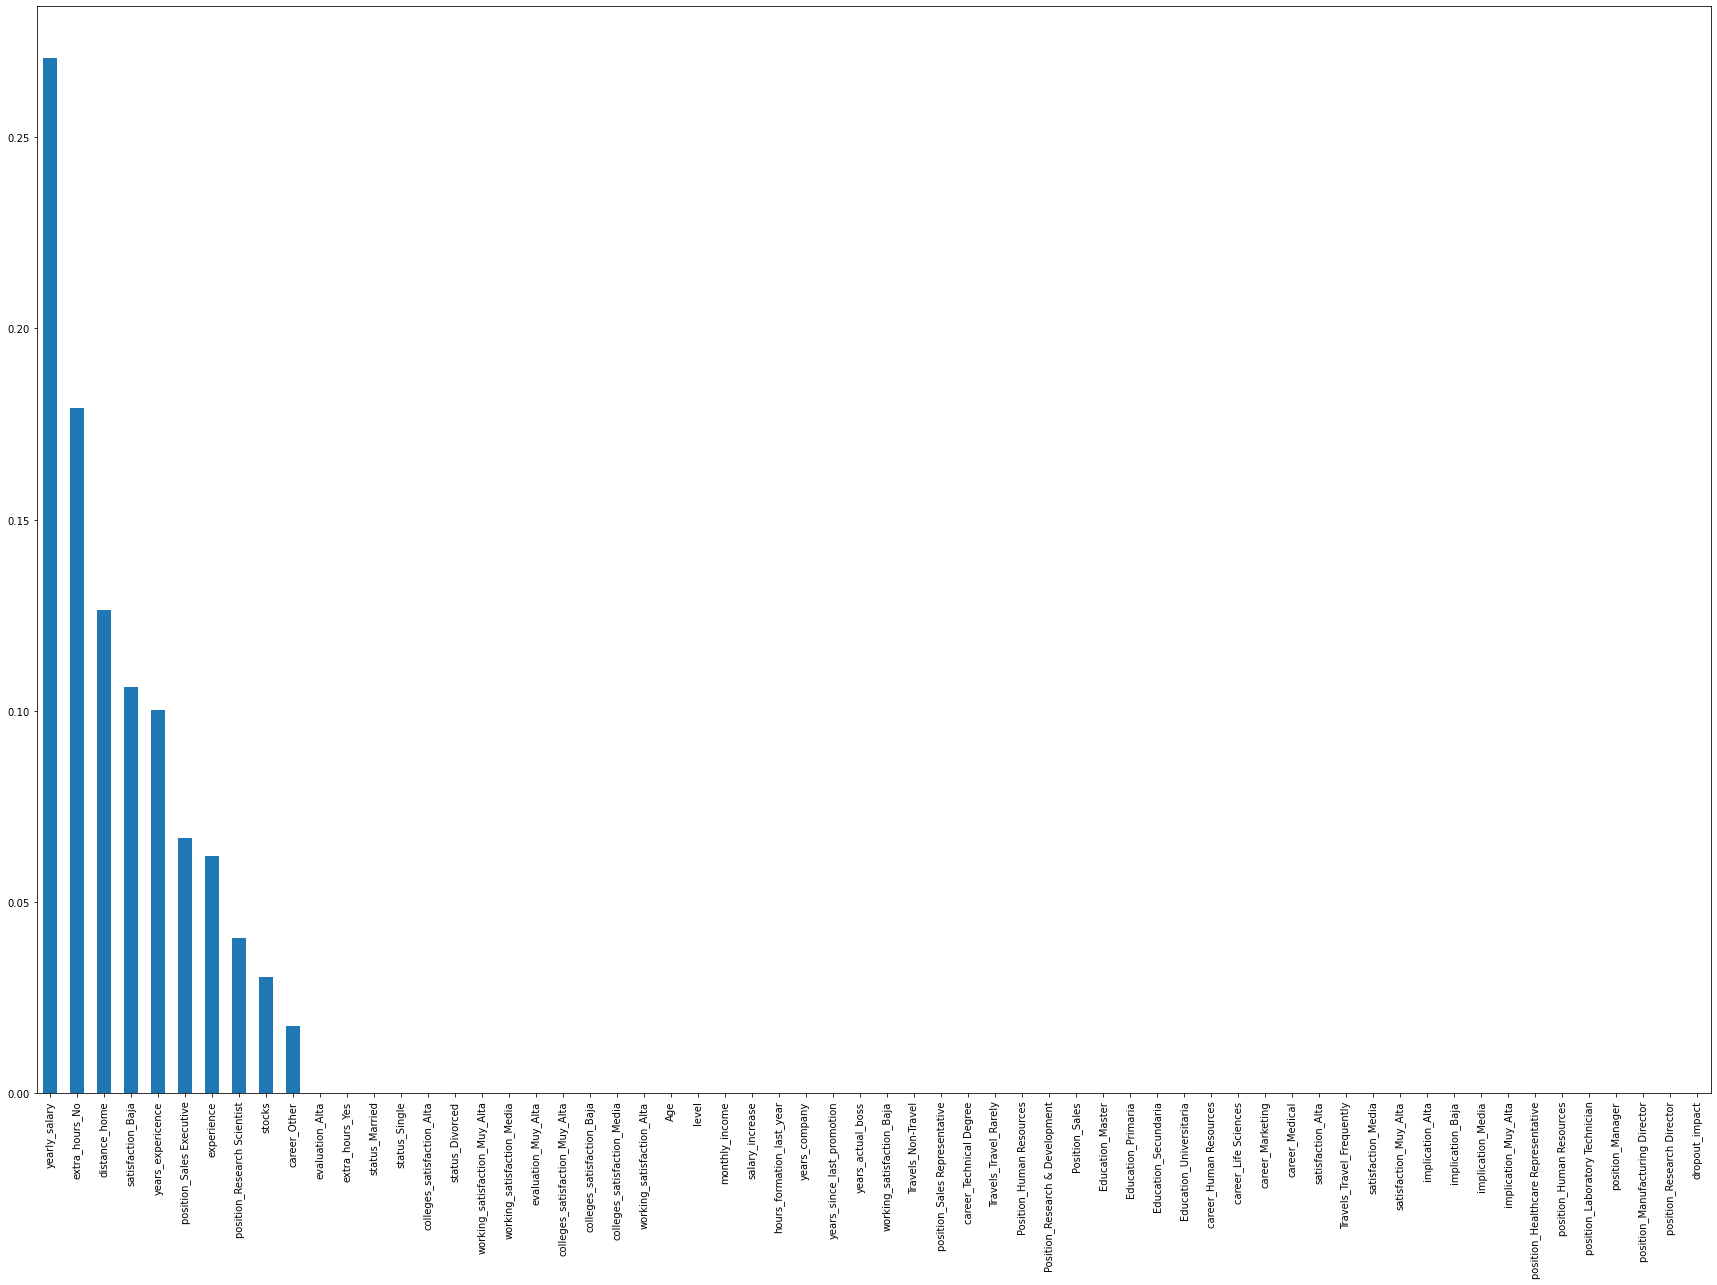

In [53]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

# Incorporation of scoring to the main dataframe

In [54]:
df['dropout_impact'] = ac.predict_proba(df_ml.drop(columns = 'Quit'))[:, 1]
df

,Age,Quit,Travels,Position,distance_home,Education,career,satisfaction,implication,level,...,evaluation,colleges_satisfaction,stocks,years_expericence,hours_formation_last_year,years_company,years_since_last_promotion,years_actual_boss,yearly_salary,dropout_impact
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,0.208333
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,0.064516
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,0.333333
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,0.333333
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,0.064516
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,0.064516
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,0.070312


Let's see the 10 employees most likely to leave the company

In [55]:
df.sort_values(by = 'dropout_impact', ascending = False)[0:10]

,Age,Quit,Travels,Position,distance_home,Education,career,satisfaction,implication,level,...,evaluation,colleges_satisfaction,stocks,years_expericence,hours_formation_last_year,years_company,years_since_last_promotion,years_actual_boss,yearly_salary,dropout_impact
id,,,,,,,,,,,,,,,,,,,,,
1467,34,1,Travel_Rarely,Human Resources,9,Universitaria,Technical Degree,Baja,Alta,1,...,Alta,Muy_Alta,0,2,0,2,2,2,32904,1.0
960,20,1,Travel_Rarely,Research & Development,4,Universitaria,Technical Degree,Baja,Alta,1,...,Alta,Media,0,1,2,1,0,0,35676,1.0
1107,26,1,Travel_Rarely,Research & Development,21,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,Alta,1,1,0,1,0,0,28524,1.0
1944,27,1,Travel_Frequently,Human Resources,22,Secundaria,Human Resources,Baja,Media,1,...,Alta,Baja,0,1,2,1,0,0,34356,1.0
1198,20,0,Travel_Rarely,Research & Development,3,Secundaria,Life Sciences,Baja,Media,1,...,Alta,Baja,0,2,2,2,1,2,36396,1.0
923,21,1,Travel_Rarely,Research & Development,18,Universitaria,Other,Muy_Alta,Alta,1,...,Alta,Baja,0,1,3,1,0,0,32316,1.0
1279,21,1,Travel_Frequently,Research & Development,10,Secundaria,Life Sciences,Baja,Media,1,...,Muy_Alta,Alta,0,2,2,2,2,2,31500,1.0
165,58,1,Travel_Rarely,Research & Development,23,Universitaria,Medical,Muy_Alta,Alta,3,...,Alta,Muy_Alta,1,40,3,40,15,6,123744,1.0
566,19,1,Travel_Rarely,Human Resources,2,Secundaria,Technical Degree,Baja,Media,1,...,Alta,Alta,0,1,3,1,0,0,30768,1.0


Risk of leaving the company for position

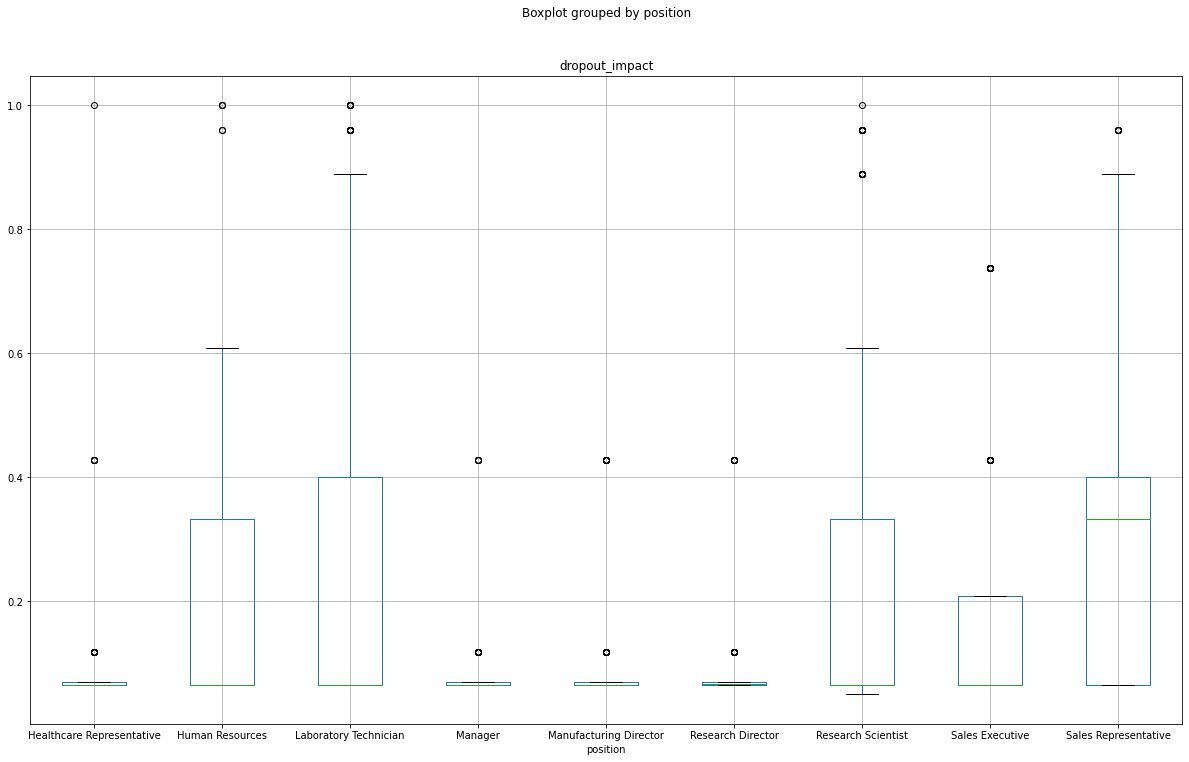

In [56]:
df.boxplot(column='dropout_impact', by='position', figsize = (20,12));

In [57]:
df

,Age,Quit,Travels,Position,distance_home,Education,career,satisfaction,implication,level,...,evaluation,colleges_satisfaction,stocks,years_expericence,hours_formation_last_year,years_company,years_since_last_promotion,years_actual_boss,yearly_salary,dropout_impact
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,0.208333
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,0.064516
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,0.333333
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,0.333333
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,0.064516
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,0.064516
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,0.070312


In [ ]:
df.to_excel('abandonment_with_scoring.xlsx') 